In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
df = pd.read_csv('jobs_in_data_2024.csv')

In [2]:
# Data Cleaning
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [3]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head().round(2))

# Summary statistics of numeric columns
print("\nSummary statistics of numeric columns:")
print(df.describe().round(2))


First few rows of the DataFrame:
   work_year experience_level employment_type               job_title  salary  \
0       2024      Entry-level       Freelance  Applied Data Scientist   30000   
1       2024        Executive       Full-time   Business Intelligence  230000   
2       2024        Executive       Full-time   Business Intelligence  176900   
3       2024           Senior       Full-time          Data Architect  171210   
4       2024           Senior       Full-time          Data Architect   92190   

  salary_currency  salary_in_usd employee_residence work_setting  \
0             USD          30000     United Kingdom       Remote   
1             USD         230000      United States    In-person   
2             USD         176900      United States    In-person   
3             USD         171210             Canada    In-person   
4             USD          92190             Canada    In-person   

  company_location company_size                    job_category  
0   U

In [6]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
Index: 8706 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8706 non-null   int64 
 1   experience_level    8706 non-null   object
 2   employment_type     8706 non-null   object
 3   job_title           8706 non-null   object
 4   salary              8706 non-null   int64 
 5   salary_currency     8706 non-null   object
 6   salary_in_usd       8706 non-null   int64 
 7   employee_residence  8706 non-null   object
 8   work_setting        8706 non-null   object
 9   company_location    8706 non-null   object
 10  company_size        8706 non-null   object
 11  job_category        8706 non-null   object
dtypes: int64(3), object(9)
memory usage: 884.2+ KB


(8706, 12)


Correlation Matrix:
               work_year    salary  salary_in_usd
work_year       1.000000  0.091097       0.095882
salary          0.091097  1.000000       0.991015
salary_in_usd   0.095882  0.991015       1.000000


C:\Users\krauj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


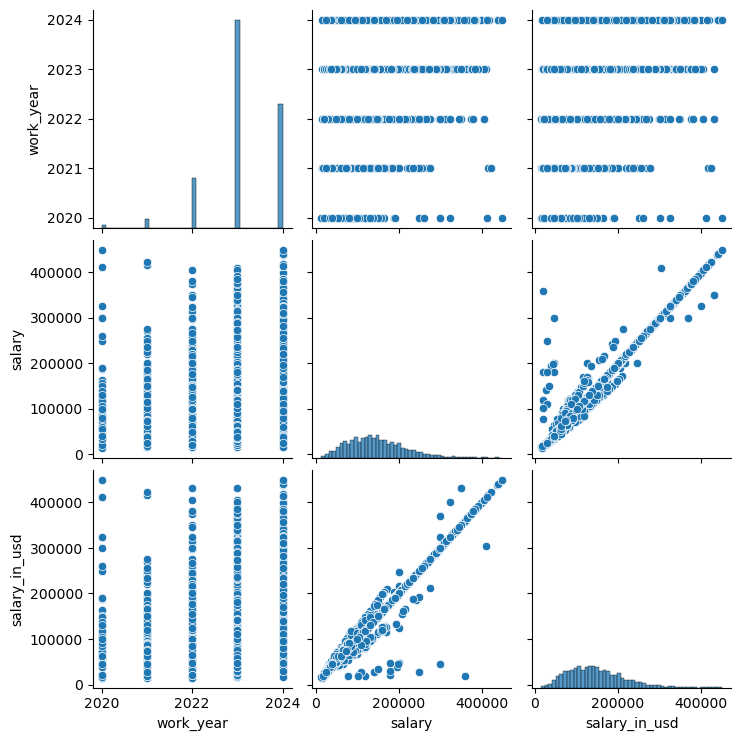

In [5]:
# Drop non-numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Correlation Analysis
correlation_matrix = df_numeric.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

sns.pairplot(df)

C:\Users\krauj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


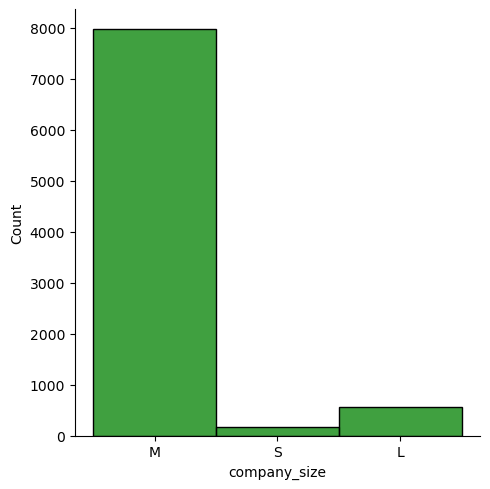

In [6]:
sns.displot(x = 'company_size', data = df, color = 'green')

C:\Users\krauj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


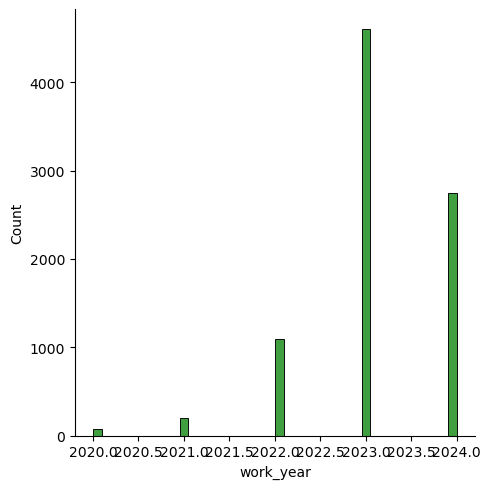

In [7]:
sns.displot(x = 'work_year', data = df, color = 'green')

C:\Users\krauj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


job_category             job_title                      
BI and Visualization     Business Intelligence Analyst      118
                         Business Intelligence Engineer      97
                         BI Developer                        55
                         Business Intelligence Developer     45
                         Business Intelligence               37
                                                           ... 
Machine Learning and AI  AI Software Engineer                 2
                         ML Ops Engineer                      2
                         Machine Learning Specialist          2
                         Deep Learning Researcher             1
                         Staff Machine Learning Engineer      1
Name: count, Length: 149, dtype: int64

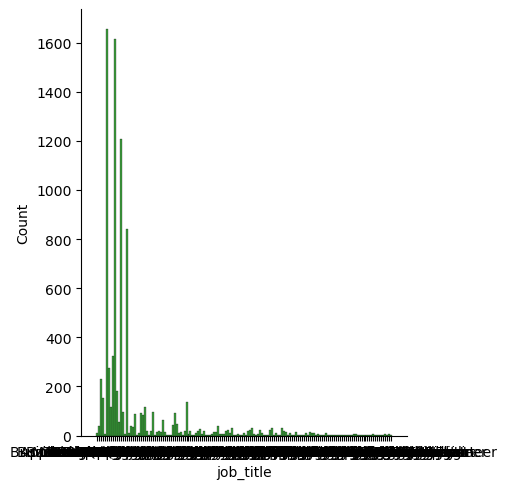

In [19]:
sns.displot(x = 'job_title', data = df, color = 'green')
df.groupby('job_category')['job_title'].value_counts()

<Axes: xlabel='job_category'>

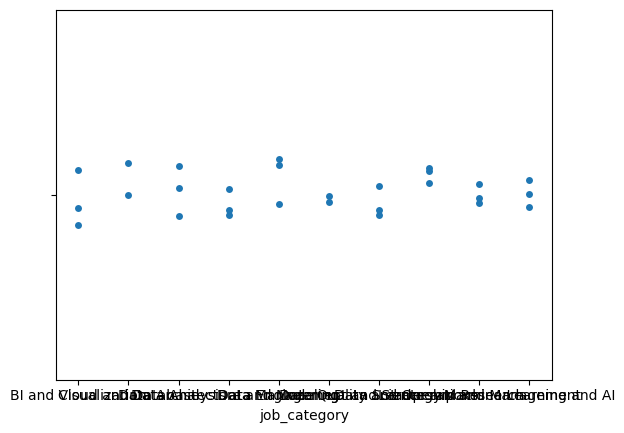

In [16]:
job_setting = df.groupby('job_category')['work_setting'].value_counts()

sns.stripplot(x = 'job_category', data=job_setting)

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

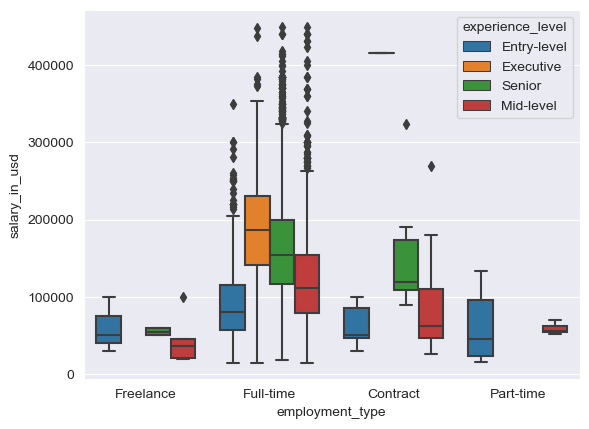

In [20]:
sns.set_style('darkgrid')
sns.boxplot(x = 'employment_type', y = 'salary_in_usd', hue = 'experience_level', data = df)

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

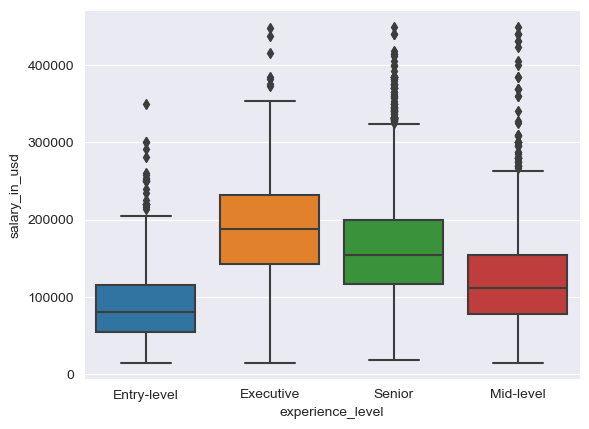

In [18]:
sns.boxplot(x = 'experience_level', y = 'salary_in_usd', data = df)

Country times in dataset:
employee_residence
United States     0.82
United Kingdom    0.06
Canada            0.04
Germany           0.01
Spain             0.01
                  ... 
Andorra           0.00
Oman              0.00
Mauritius         0.00
Qatar             0.00
Luxembourg        0.00
Name: proportion, Length: 86, dtype: float64
['United Kingdom' 'United States' 'Canada' 'Lithuania' 'Poland' 'France'
 'Germany' 'Saudi Arabia' 'India' 'Australia' 'United Arab Emirates'
 'Ukraine' 'Netherlands' 'Egypt' 'Austria' 'Spain' 'Philippines' 'Finland'
 'Türkiye' 'Switzerland' 'Oman' 'New Zealand' 'Mexico' 'Portugal'
 'Bosnia and Herzegovina' 'Brazil' 'Argentina' 'Latvia' 'South Africa'
 'Italy' 'Ireland' 'Estonia' 'Malta' 'Croatia' 'Lebanon' 'Romania'
 'Hungary' 'Viet Nam' 'Nigeria' 'Czechia' 'Pakistan' 'Uganda' 'Colombia'
 'Slovenia' 'Greece' 'Mauritius' 'Armenia' 'Thailand' 'Korea, Republic of'
 'Qatar' 'Russian Federation' 'Kenya' 'Tunisia' 'Ghana' 'Belgium'
 'Andorra' 'Ecuador' '

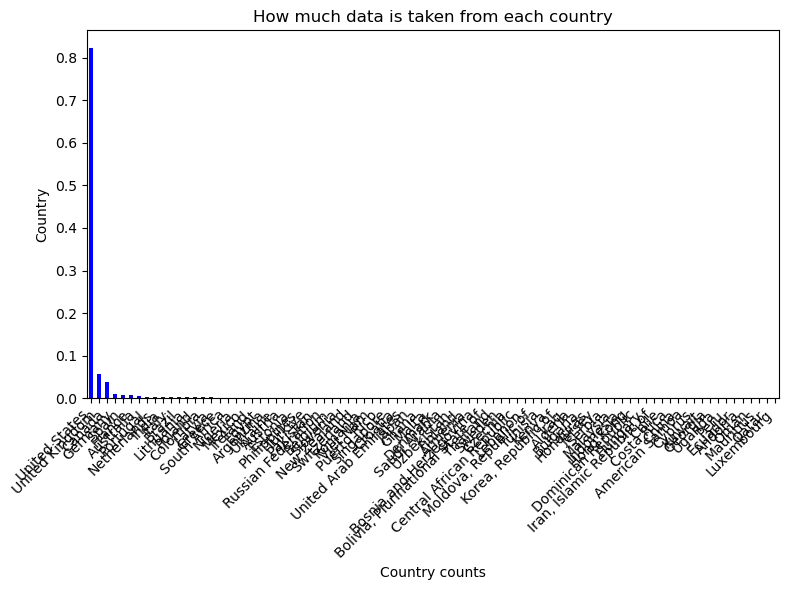

In [5]:
# How much data is taken from each country
data_from_country_times = df['employee_residence'].value_counts(normalize = True)
print("Country times in dataset:")
print(data_from_country_times.round(2))
print(df['employee_residence'].unique())

#Visualizatoin - How much data is taken from each country
plt.figure(figsize=(8,6))
data_from_country_times.plot(kind='bar', color='blue')
plt.title('How much data is taken from each country')
plt.xlabel('Country counts')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Salary Trends Over Time considering Job Categories:
job_category  BI and Visualization  Cloud and Database  Data Analysis  \
work_year                                                               
2020                           NaN                 NaN       68014.67   
2021                           NaN                 NaN       87818.50   
2022                     100875.00           175000.00      103239.32   
2023                     123545.09           141666.67      107374.17   
2024                     116120.56           132666.67      106727.29   

job_category  Data Architecture and Modeling  Data Engineering  \
work_year                                                        
2020                                     NaN          94575.82   
2021                               169940.60         105083.02   
2022                               170005.10         138580.26   
2023                               152970.29         147461.50   
2024                               1567

<Figure size 1000x600 with 0 Axes>

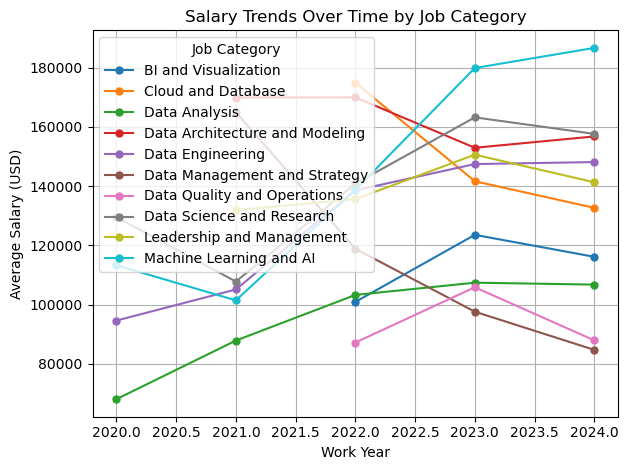

In [17]:
# Salary Trends Over Time considering Job Categories
salary_trends_over_time_and_category = df.groupby(['work_year', 'job_category'])['salary_in_usd'].mean().unstack()
print("\nSalary Trends Over Time considering Job Categories:")
print(salary_trends_over_time_and_category.round(2))

# Visualization - Salary Trends Over Time considering Job Categories
plt.figure(figsize=(10, 6))
salary_trends_over_time_and_category.plot(marker='o', markersize=5)
plt.title('Salary Trends Over Time by Job Category')
plt.xlabel('Work Year')
plt.ylabel('Average Salary (USD)')
plt.legend(title='Job Category')
plt.grid(True)
plt.tight_layout()
plt.show()


Impact of Experience Level on Salary:
experience_level
Entry-level     90266.81
Executive      192117.81
Mid-level      122225.49
Senior         162482.15
Name: salary_in_usd, dtype: float64


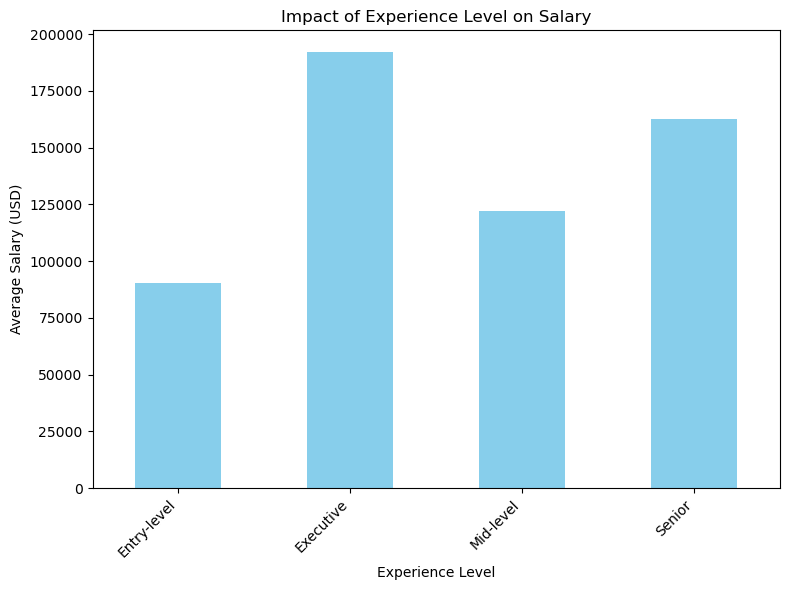

In [7]:
# Impact of Experience Level on Salary
salary_by_experience_level = df.groupby('experience_level')['salary_in_usd'].mean()
print("\nImpact of Experience Level on Salary:")
print(salary_by_experience_level.round(2))

# Visualization - Impact of Experience Level on Salary
plt.figure(figsize=(8, 6))
salary_by_experience_level.plot(kind='bar', color='skyblue')
plt.title('Impact of Experience Level on Salary')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Effect of Employment Type on Salary:
employment_type
Contract     112007.50
Freelance     51879.58
Full-time    146504.82
Part-time     61493.50
Name: salary_in_usd, dtype: float64


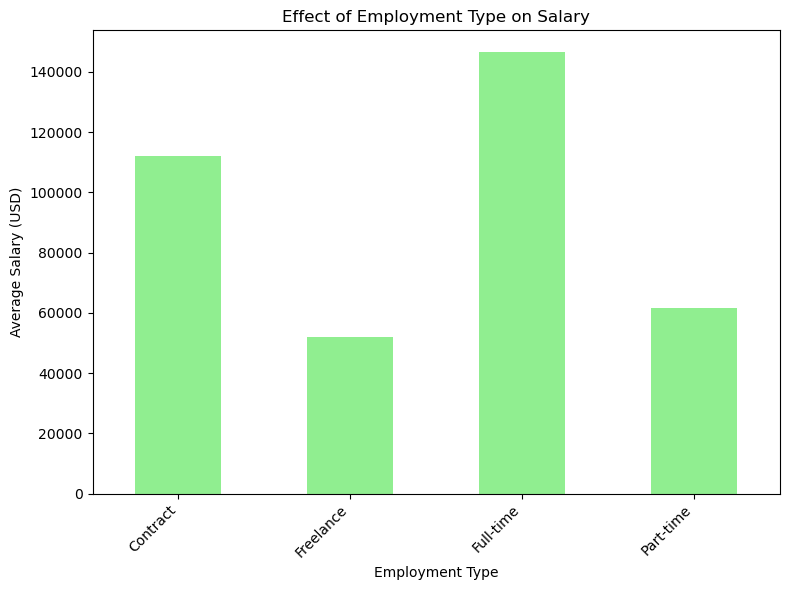

In [8]:
# Effect of Employment Type on Salary
salary_by_employment_type = df.groupby('employment_type')['salary_in_usd'].mean()
print("\nEffect of Employment Type on Salary:")
print(salary_by_employment_type.round(2))

# Visualization - Effect of Employment Type on Salary
plt.figure(figsize=(8, 6))
salary_by_employment_type.plot(kind='bar', color='lightgreen')
plt.title('Effect of Employment Type on Salary')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Job Categories and Salary:
job_category
BI and Visualization              119921.03
Cloud and Database                142818.18
Data Analysis                     105697.89
Data Architecture and Modeling    156188.87
Data Engineering                  144612.60
Data Management and Strategy       95084.74
Data Quality and Operations        98091.99
Data Science and Research         156873.71
Leadership and Management         145414.51
Machine Learning and AI           175043.47
Name: salary_in_usd, dtype: float64


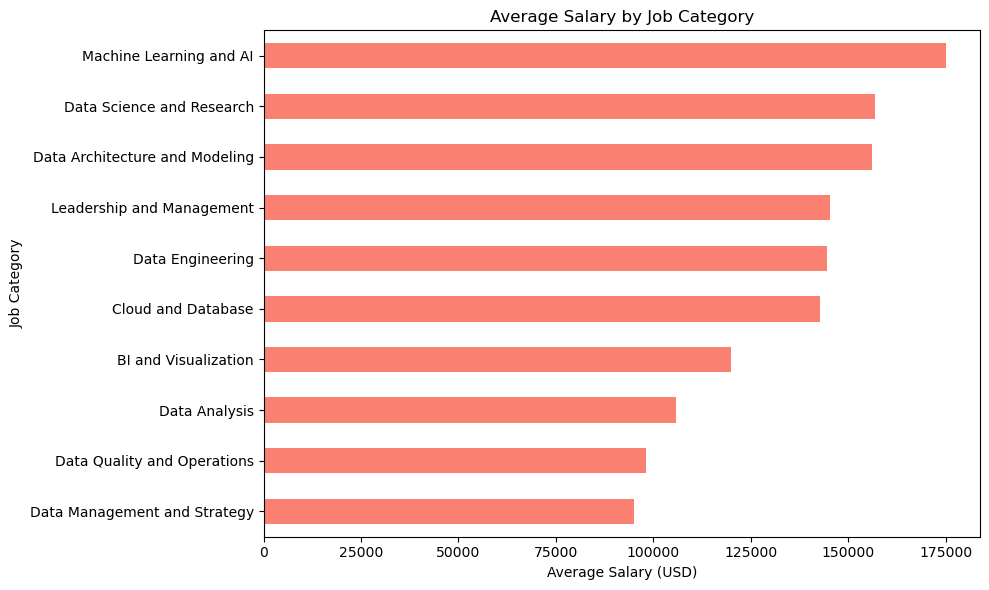

In [9]:
# Job Categories and Salary
salary_by_job_category = df.groupby('job_category')['salary_in_usd'].mean()
print("\nJob Categories and Salary:")
print(salary_by_job_category.round(2))

# Visualization - Job Categories and Salary
plt.figure(figsize=(10, 6))
salary_by_job_category.sort_values().plot(kind='barh', color='salmon')
plt.title('Average Salary by Job Category')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Category')
plt.tight_layout()
plt.show()

In [10]:
# Calculate average, max, min salary by job_title
salary_stats_by_job_title = df.groupby('job_title')['salary_in_usd'].agg(['mean', 'max', 'min']).round(2)
print("\nAverage, Max, Min Salary by Job Title:")
print(salary_stats_by_job_title)


Average, Max, Min Salary by Job Title:
                                      mean     max     min
job_title                                                 
AI Architect                     216563.88  330000   99750
AI Developer                     135466.79  275000   33333
AI Engineer                      167112.79  400000   21593
AI Product Manager               141766.67  212000   93300
AI Programmer                     62347.83  120000   30000
...                                    ...     ...     ...
Sales Data Analyst                60000.00   60000   60000
Software Data Engineer           111627.67  210000   50000
Staff Data Analyst                79917.00  179998   15000
Staff Data Scientist             134500.00  164000  105000
Staff Machine Learning Engineer  185000.00  185000  185000

[149 rows x 3 columns]


In [11]:
# Calculate average, max, min salary by job_title and country
salary_stats_by_job_title_and_country = df.groupby(['job_title', 'employee_residence'])['salary_in_usd'].agg(['mean', 'max', 'min']).round(2)
print("\nAverage, Max, Min Salary by Job Title and Country:")
print(salary_stats_by_job_title_and_country)



Average, Max, Min Salary by Job Title and Country:
                                                             mean     max  \
job_title                       employee_residence                          
AI Architect                    Belgium                 215936.00  215936   
                                United States           216603.12  330000   
AI Developer                    Bosnia and Herzegovina  120000.00  120000   
                                Canada                  275000.00  275000   
                                Finland                  74883.00   74883   
...                                                           ...     ...   
Staff Data Analyst              Canada                   44753.00   44753   
                                Nigeria                  15000.00   15000   
                                Saudi Arabia            179998.00  179998   
Staff Data Scientist            United States           134500.00  164000   
Staff Machine Learning E


Average Salary by Job Category and Company Size:
job_category                    company_size
BI and Visualization            L               121467.77
                                M               119620.30
                                S               200000.00
Cloud and Database              L               170000.00
                                M               140100.00
Data Analysis                   L                85571.58
                                M               107760.57
                                S                75135.59
Data Architecture and Modeling  L               177949.92
                                M               155232.34
Data Engineering                L               115414.84
                                M               146922.75
                                S                91425.71
Data Management and Strategy    L               141658.60
                                M                92633.48
Data Quality and Operations     L  

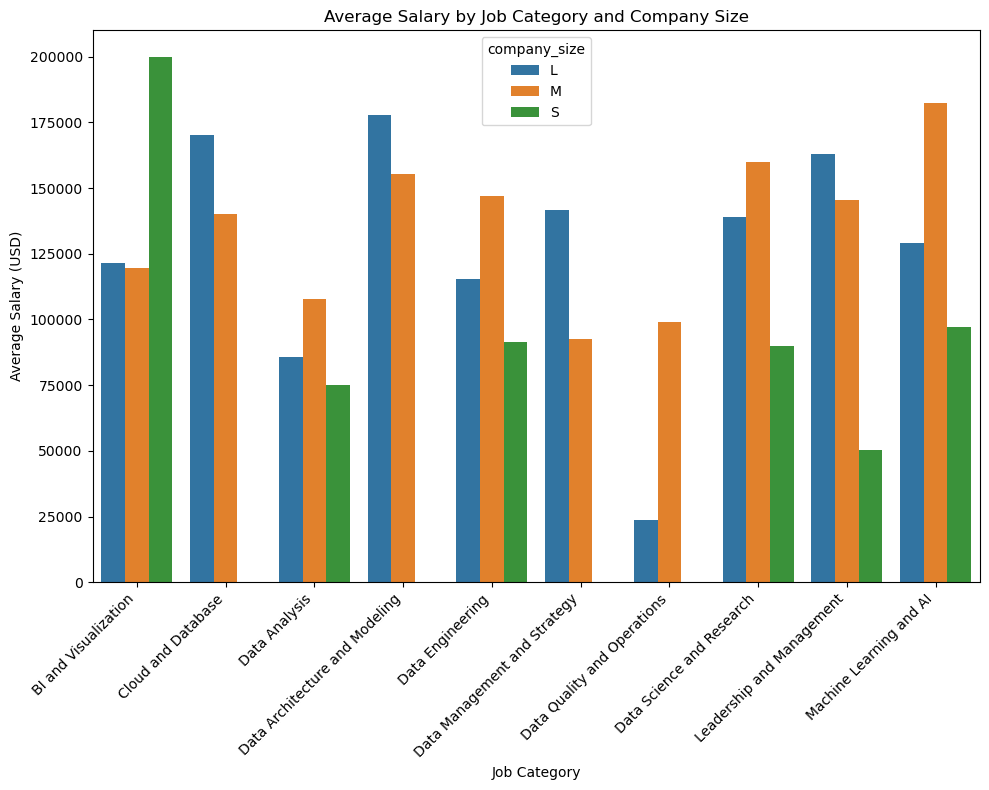

In [12]:
# Calculate average salary by job_category and company_size
average_salary_by_category_and_size = df.groupby(['job_category', 'company_size'])['salary_in_usd'].mean().round(2)
print("\nAverage Salary by Job Category and Company Size:")
print(average_salary_by_category_and_size)

# Convert the series to a DataFrame
average_salary_df = average_salary_by_category_and_size.reset_index()

# Visualization - Average Salary by Job Category and Company Size using Seaborn barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='job_category', y='salary_in_usd', hue='company_size', data= average_salary_df)
plt.title('Average Salary by Job Category and Company Size')
plt.xlabel('Job Category')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
max_salary_job_title_by_category = df.loc[df.groupby('job_category')['salary_in_usd'].idxmax()][['job_category', 'job_title', 'salary_in_usd']]
print("\nJob Title with Maximum Salary in Each Job Category:")
print(max_salary_job_title_by_category)


Job Title with Maximum Salary in Each Job Category:
                         job_category                      job_title  \
1704             BI and Visualization  Business Intelligence Manager   
12409              Cloud and Database        Cloud Database Engineer   
12527                   Data Analysis                   Data Analyst   
3433   Data Architecture and Modeling                 Data Architect   
936                  Data Engineering   Data Infrastructure Engineer   
6280     Data Management and Strategy          Data Strategy Manager   
10167     Data Quality and Operations       Data Operations Engineer   
3362        Data Science and Research              Research Engineer   
10546       Leadership and Management             Analytics Engineer   
1911          Machine Learning and AI       Head of Machine Learning   

       salary_in_usd  
1704          263000  
12409         190000  
12527         430967  
3433          381500  
936           385000  
6280          25

In [14]:
min_salary_job_title_by_category = df.loc[df.groupby('job_category')['salary_in_usd'].idxmin()][['job_category', 'job_title', 'salary_in_usd']]
print("\nJob Title with Minimum Salary in Each Job Category:")
print(min_salary_job_title_by_category)



Job Title with Minimum Salary in Each Job Category:
                         job_category                        job_title  \
8527             BI and Visualization  Business Intelligence Developer   
48                 Cloud and Database          Cloud Database Engineer   
10726                   Data Analysis               Staff Data Analyst   
1920   Data Architecture and Modeling                   Data Architect   
1273                 Data Engineering                    Data Engineer   
3179     Data Management and Strategy                  Data Specialist   
9092      Data Quality and Operations            Data Quality Engineer   
9375        Data Science and Research                   Data Scientist   
13957       Leadership and Management          Data Analytics Engineer   
13334         Machine Learning and AI       Machine Learning Developer   

       salary_in_usd  
8527           15000  
48             82000  
10726          15000  
1920           39245  
1273           17